In [37]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Task 1:

In [4]:
biden_all = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')
trump_all = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')

In [5]:
biden_america = biden_all[biden_all['country']=="United States of America"].copy()
biden = biden_america[['created_at','tweet','user_description']].copy()

trump_america = trump_all[trump_all['country']=="United States of America"].copy()
trump = trump_america[['created_at','tweet','user_description']].copy()

## Task 2:

Delete user names and links from the tweets.

In [6]:
regex_list = ['@[A-Za-z0-9]{1,}','http(s){0,}[\S]{1,}','\n']

tweets_biden = biden['tweet'].to_list()
print(tweets_biden[:5])
for i in np.arange(len(tweets_biden)):
    for k in np.arange(len(regex_list)):
        tweets_biden[i] = re.sub(regex_list[k], '', tweets_biden[i], count=0, flags=0)
print(tweets_biden[:5])

tweets_trump = trump['tweet'].to_list()
print(tweets_trump[:5])
for i in np.arange(len(tweets_trump)):
    for k in np.arange(len(regex_list)):
        tweets_trump[i] = re.sub(regex_list[k], '', tweets_trump[i], count=0, flags=0)
print(tweets_trump[:5])

['#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi', '@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip', '#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl', 'In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?', 'FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU']
['#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él

Preprocesing the tweets after removing user names and links.

In [7]:
tweet_preprocessed_biden = []
print(tweets_biden[:5])
for tweet in tweets_biden:
    text= ""
    for char in tweet:
        if char.isalpha() or char.isspace():
            text += char.lower()
    tweet_preprocessed_biden.append(text)
print(tweet_preprocessed_biden[:5])

tweet_preprocessed_trump = []
for tweet in tweets_trump:
    text= ""
    for char in tweet:
        if char.isalpha() or char.isspace():
            text += char.lower()
    tweet_preprocessed_trump.append(text)

['#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️⠀🌐_#ElSolLatino #yobrilloconelsol ', '   This is how #Biden made his ! #TrumpIsNotAmerica !', '#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption ', 'In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.but CCP from #China or porn on Twitter? That’s always been fine for    . is  sick?', 'FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden ']
['elecciones  en florida joebiden dice que donaldtrump solo se preocupa por él mismo el demócrata fue anfitrión de encuentros de electores en pembrokepines y miramar clic aquí elsollatino yobrilloconelsol ', '   this is how biden made his  trumpisnotamerica ', 'censorship hunterbiden biden bidenemails bidenem

In [8]:
biden['tweet_preprocessed'] = tweet_preprocessed_biden
trump['tweet_preprocessed'] = tweet_preprocessed_trump

## Task 3:

In [9]:
afinn = pd.read_csv('AFINN.txt', delimiter="\t",header=None)
afinn.columns = ['word','value']

In [10]:
print(afinn.head())

        word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2


In [11]:
afinn_dict = dict(zip(afinn.word, afinn.value))

In [12]:
sentiment_scores_biden = []
print(len(tweet_preprocessed_biden))
for i in np.arange(len(tweet_preprocessed_biden)):
    text_split = tweet_preprocessed_biden[i].split()
    sentiment_score = 0
    for k in np.arange(len(text_split)):
        
        for key, value in afinn_dict.items():
            if text_split[k] == key:
                sentiment_score+=value
    sentiment_scores_biden.append(sentiment_score)  


153596


In [13]:
sentiment_scores_trump = []
print(len(tweet_preprocessed_trump))
for i in np.arange(len(tweet_preprocessed_trump)):
    text_split = tweet_preprocessed_trump[i].split()
    sentiment_score = 0
    for k in np.arange(len(text_split)):
        
        for key, value in afinn_dict.items():
            if text_split[k] == key:
                sentiment_score+=value
    sentiment_scores_trump.append(sentiment_score)  


178899


In [14]:
biden['sentiment_score'] = sentiment_scores_biden


In [15]:
trump['sentiment_score'] = sentiment_scores_trump

## Task 4:

For hashtag biden:

In [16]:
biden.user_description = biden.user_description.fillna('')
userdescriptions_biden = biden['user_description'].to_list()
userdescriptions_preprocessed_biden = []

for i in np.arange(len(userdescriptions_biden)):
    text= ""
    for k in np.arange(len(userdescriptions_biden[i])):
        if userdescriptions_biden[i][k].isalpha() or userdescriptions_biden[i][k].isspace():
            text += userdescriptions_biden[i][k].lower()
    userdescriptions_preprocessed_biden.append(text)

    

In [17]:
political_attitude_biden = []

for count, value in enumerate(userdescriptions_biden):
    if bool(re.search('[Dd]emocrat', value)) and bool(re.search('[Rr]epublican', value)):
        political_attitude_biden.append('not_determinable')
    elif bool(re.search('[Dd]emocrat', value)):
        political_attitude_biden.append('democrat')
    elif bool(re.search('[Rr]epublican', value)):
        political_attitude_biden.append('republican')
    else:
        political_attitude_biden.append('not_determinable')
print(len(political_attitude_biden),political_attitude_biden)
print(biden.shape)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
not_determined_biden = []

for count, value in enumerate(userdescriptions_biden):
    if bool(re.search('[Dd]emocrat', value)) and bool(re.search('[Rr]epublican', value)):
        not_determined_biden.append(count)
print(len(not_determined_biden),not_determined_biden)

republican_biden = []

for count, value in enumerate(userdescriptions_biden):
    if bool(re.search('[Rr]epublican', value)):
        republican_biden.append(count)
print(len(republican_biden),republican_biden)

democrat_biden = []

for count, value in enumerate(userdescriptions_biden):
    if bool(re.search('[Dd]emocrat', value)):
        democrat_biden.append(count)
print(len(democrat_biden),democrat_biden)

265 [250, 333, 435, 446, 447, 455, 463, 500, 518, 547, 556, 560, 564, 568, 569, 581, 586, 612, 625, 644, 652, 655, 685, 690, 776, 5928, 6835, 7841, 8748, 8942, 11200, 12074, 12081, 12379, 12408, 12892, 12901, 13045, 13296, 13377, 13854, 14111, 14155, 14165, 14435, 14705, 15398, 15662, 15718, 15768, 16075, 16087, 16108, 16444, 16808, 17989, 18639, 20155, 20196, 20756, 20793, 20814, 20892, 21547, 22440, 23180, 23374, 23454, 23499, 23974, 24329, 25542, 25629, 25937, 26450, 26836, 27293, 28289, 28306, 28570, 28574, 28598, 29120, 29123, 29129, 29132, 29383, 29767, 29769, 30129, 30248, 32225, 32257, 32271, 33282, 33621, 34009, 34160, 34191, 34261, 34497, 34602, 35120, 35590, 37822, 40026, 40616, 41185, 41479, 41488, 41525, 41810, 41831, 41898, 41940, 42246, 42787, 42890, 43655, 43901, 45727, 45832, 46512, 47364, 47392, 48500, 48503, 50805, 51515, 52236, 52303, 52544, 52594, 52753, 52756, 53926, 54267, 54269, 54399, 54412, 54430, 55739, 55906, 55963, 56226, 56635, 56657, 57051, 57231, 57234, 

4687 [12, 37, 94, 111, 127, 141, 205, 241, 247, 250, 277, 321, 326, 333, 334, 389, 406, 408, 410, 422, 435, 444, 446, 447, 455, 463, 489, 495, 496, 500, 518, 547, 556, 560, 564, 568, 569, 579, 581, 586, 599, 608, 612, 625, 644, 652, 655, 685, 690, 691, 703, 710, 717, 759, 776, 782, 786, 812, 831, 849, 870, 936, 948, 949, 995, 1003, 1014, 1150, 1156, 1161, 1183, 1270, 1278, 1291, 1381, 1415, 1474, 1520, 1522, 1524, 1574, 1629, 1654, 1698, 1734, 1746, 1752, 1784, 1809, 1829, 1893, 1964, 1965, 1977, 1979, 2003, 2023, 2024, 2026, 2028, 2036, 2044, 2065, 2090, 2091, 2106, 2136, 2137, 2177, 2184, 2190, 2237, 2297, 2317, 2323, 2338, 2360, 2388, 2403, 2416, 2430, 2445, 2449, 2454, 2466, 2469, 2473, 2486, 2492, 2713, 2715, 2731, 2752, 2776, 2789, 2864, 2887, 2900, 2910, 2931, 2954, 2969, 2971, 2975, 2978, 2979, 2994, 2999, 3027, 3040, 3074, 3093, 3149, 3206, 3216, 3298, 3371, 3431, 3436, 3455, 3466, 3488, 3501, 3502, 3558, 3574, 3595, 3647, 3659, 3686, 3692, 3717, 3721, 3747, 3768, 3769, 3770, 

In [19]:
political_attitude_biden = ['not_determined'] * biden.shape[0]

In [20]:
for i in democrat_biden:
    political_attitude_biden[i]= 'democrat'
for i in republican_biden:
    political_attitude_biden[i]= 'republican'
for i in not_determined_biden:
    political_attitude_biden[i]= 'not_determined'

In [21]:
biden['political_attitude_biden'] = political_attitude_biden

In [22]:
biden['political_attitude_biden'].value_counts()

not_determined    147484
democrat            4422
republican          1690
Name: political_attitude_biden, dtype: int64

In [23]:
biden.groupby('political_attitude_biden')['sentiment_score'].mean()

political_attitude_biden
democrat          0.107417
not_determined    0.346112
republican       -0.172189
Name: sentiment_score, dtype: float64

For hashtag trump:

In [24]:
trump.user_description = trump.user_description.fillna('')
userdescriptions_trump = trump['user_description'].to_list()
userdescriptions_preprocessed_trump = []

for i in np.arange(len(userdescriptions_trump)):
    text= ""
    for k in np.arange(len(userdescriptions_trump[i])):
        if userdescriptions_trump[i][k].isalpha() or userdescriptions_trump[i][k].isspace():
            text += userdescriptions_trump[i][k].lower()
    userdescriptions_preprocessed_trump.append(text)

    

In [25]:
not_determined_trump = []

for count, value in enumerate(userdescriptions_trump):
    if bool(re.search('[Dd]emocrat', value)) and bool(re.search('[Rr]epublican', value)):
        not_determined_trump.append(count)
print(len(not_determined_trump),not_determined_trump)

republican_trump = []

for count, value in enumerate(userdescriptions_trump):
    if bool(re.search('[Rr]epublican', value)):
        republican_trump.append(count)
print(len(republican_trump),republican_trump)

democrat_trump = []

for count, value in enumerate(userdescriptions_trump):
    if bool(re.search('[Dd]emocrat', value)):
        democrat_trump.append(count)
print(len(democrat_trump),democrat_trump)

249 [1013, 1427, 1476, 1586, 1602, 2517, 2630, 3311, 3717, 4024, 4166, 5103, 6681, 7382, 7608, 10184, 10545, 12278, 12292, 12405, 12468, 12577, 12670, 13250, 13378, 13975, 14372, 14513, 14689, 15087, 15318, 18260, 19134, 19859, 20786, 21732, 22319, 23123, 24376, 24774, 24958, 25071, 25113, 25488, 26106, 26433, 27005, 27220, 27720, 27855, 28290, 28956, 29251, 29939, 29944, 31314, 31420, 31465, 31728, 32071, 32824, 35583, 36603, 36907, 37118, 37154, 38098, 38266, 40495, 42221, 42522, 42595, 49628, 50642, 50660, 50720, 51683, 54483, 55420, 55713, 55750, 55783, 57266, 57986, 58838, 59031, 60853, 60956, 61754, 61968, 62649, 63335, 63357, 63359, 63886, 64097, 67274, 67286, 68041, 68583, 68942, 69076, 70235, 70390, 70642, 71021, 71068, 73192, 73695, 74380, 74401, 78436, 79084, 79117, 79199, 79349, 80262, 85067, 89230, 89591, 90783, 93176, 93575, 93965, 93970, 94040, 94509, 94668, 95577, 95582, 95590, 95757, 95818, 95823, 97954, 100642, 101700, 101841, 102220, 102241, 104185, 104928, 105232, 1

In [26]:
political_attitude_trump = ['not_determined'] * trump.shape[0]

In [27]:
for i in democrat_trump:
    political_attitude_trump[i]= 'democrat'
for i in republican_trump:
    political_attitude_trump[i]= 'republican'
for i in not_determined_trump:
    political_attitude_trump[i]= 'not_determined'

In [28]:
trump['political_attitude_biden'] = political_attitude_trump

In [29]:
trump['political_attitude_biden'].value_counts()

not_determined    170563
democrat            5335
republican          3001
Name: political_attitude_biden, dtype: int64

In [30]:
trump.groupby('political_attitude_biden')['sentiment_score'].mean()

political_attitude_biden
democrat         -0.960825
not_determined   -0.385089
republican       -0.490836
Name: sentiment_score, dtype: float64

## Task 5:

For hashtag biden:

In [31]:
biden['created_at']= pd.to_datetime(biden['created_at'])

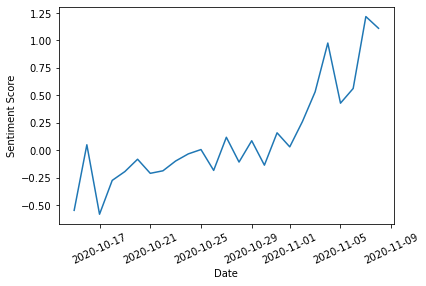

In [39]:
biden.groupby(biden['created_at'].dt.date)["sentiment_score"].mean().plot(kind="line",rot=25)
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.show()

For hashtag trump:

In [33]:
trump['created_at']= pd.to_datetime(trump['created_at'])

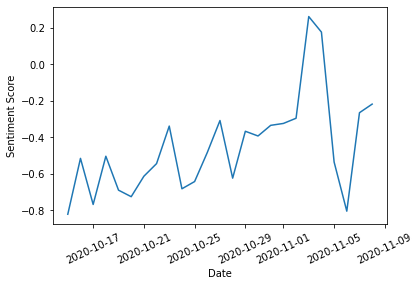

In [40]:
trump.groupby(trump['created_at'].dt.date)["sentiment_score"].mean().plot(kind="line",rot=25)
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.show()